<a href="https://colab.research.google.com/github/Jeevinee/Laptop_price/blob/main/laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
df=pd.read_csv("/content/laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [9]:
df['Ram'] = df['Ram'].str.replace('GB', '')

In [10]:
df['Weight'] = df['Weight'].str.replace('kg', '')

In [11]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

<ipython-input-12-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

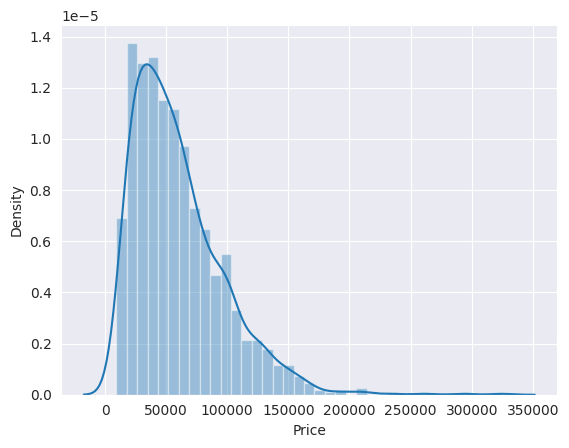

In [12]:
sns.distplot(df['Price'])

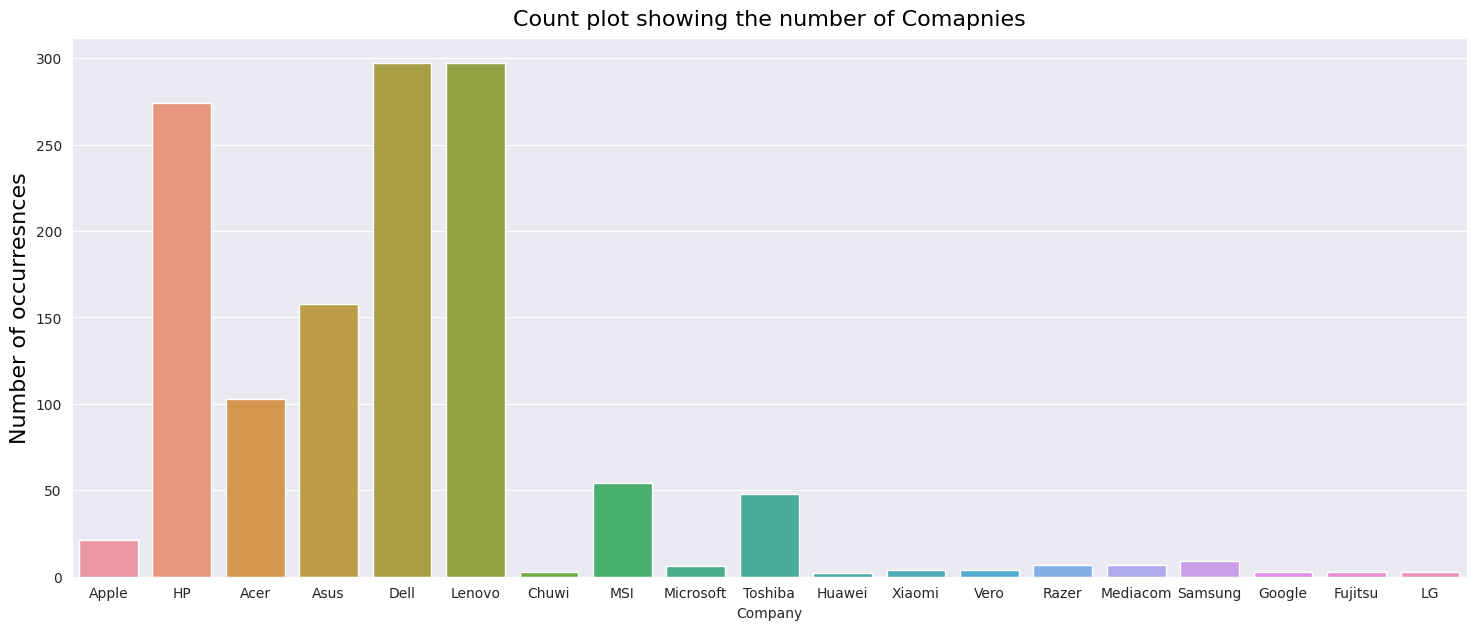

In [14]:
font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
                  'verticalalignment':'bottom'}

def countplot(column, xlabel, ylabel, title):
    plt.figure(figsize = (18,7))
    plot = sns.countplot(x= column, data = df)
    plt.setp(plot.get_xticklabels(), rotation=0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel, **font)
    plt.title(title, **font)
    plt.show()
countplot('Company', 'Company', 'Number of occurresnces', 'Count plot showing the number of Comapnies')

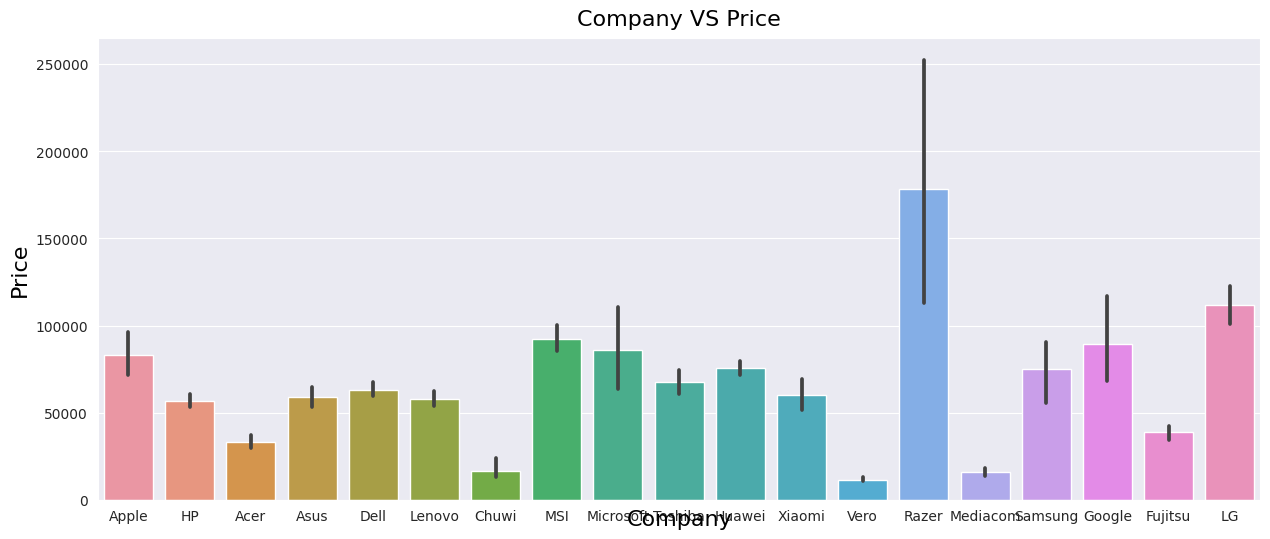

In [15]:
plt.figure(figsize = (15,6))
plot = sns.barplot(x = df['Company'], y= df['Price'])
plt.xticks(rotation = 'vertical')
plt.setp(plot.get_xticklabels(), rotation=0)
plt.xlabel('Company',  **font)
plt.ylabel('Price', **font)
plt.title('Company VS Price', **font)
plt.show()
plt.show()

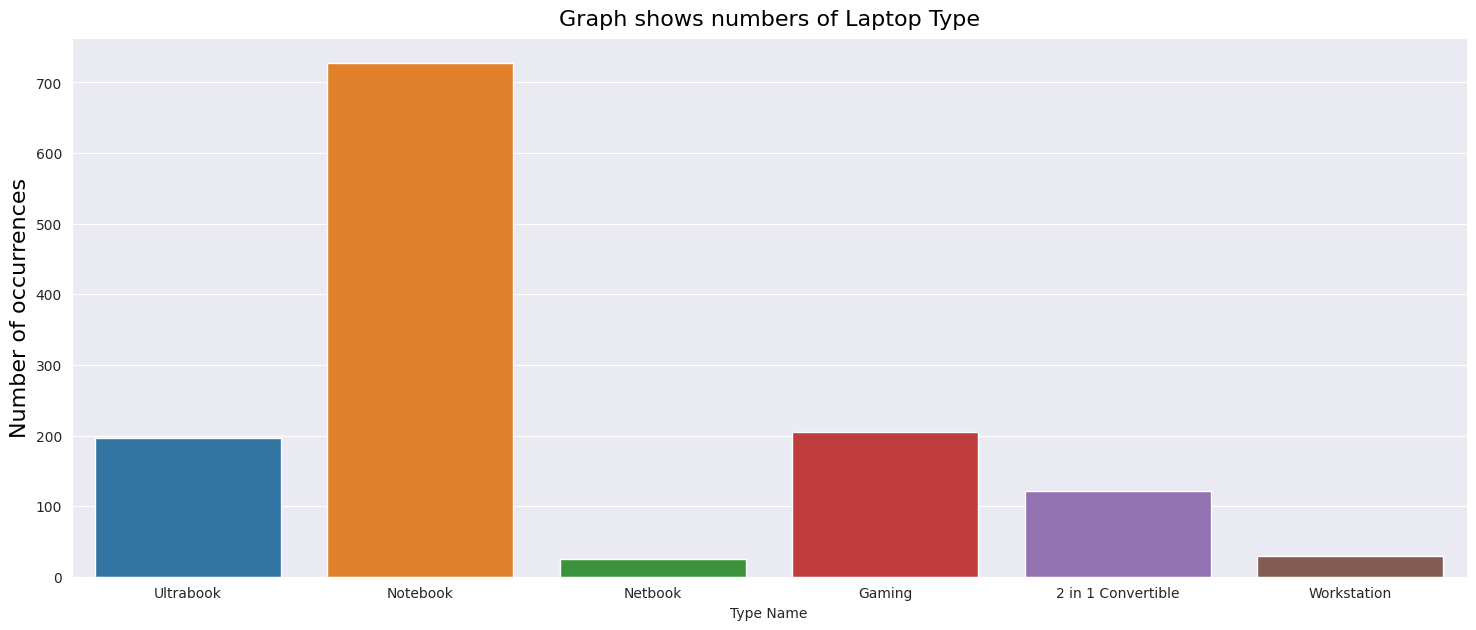

In [16]:
countplot('TypeName', 'Type Name', 'Number of occurrences', 'Graph shows numbers of Laptop Type')

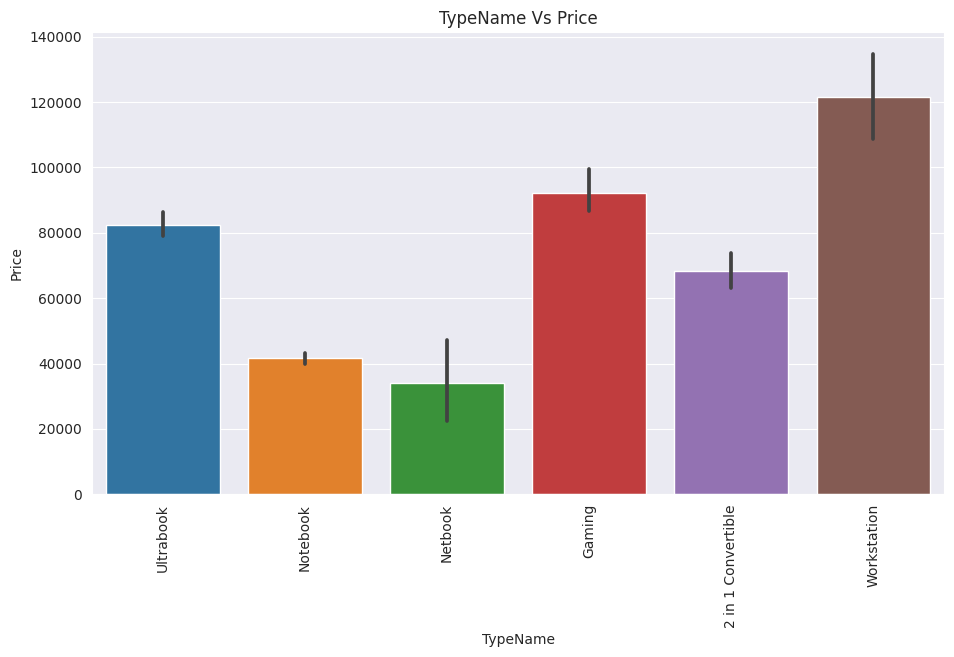

In [17]:
plt.figure(figsize = (11,6))
sns.barplot(x = df['TypeName'], y= df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('TypeName Vs Price')
plt.show()

<ipython-input-18-51888cb550e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

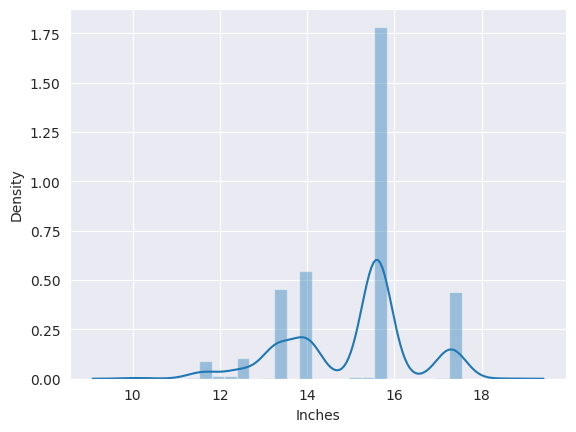

In [18]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

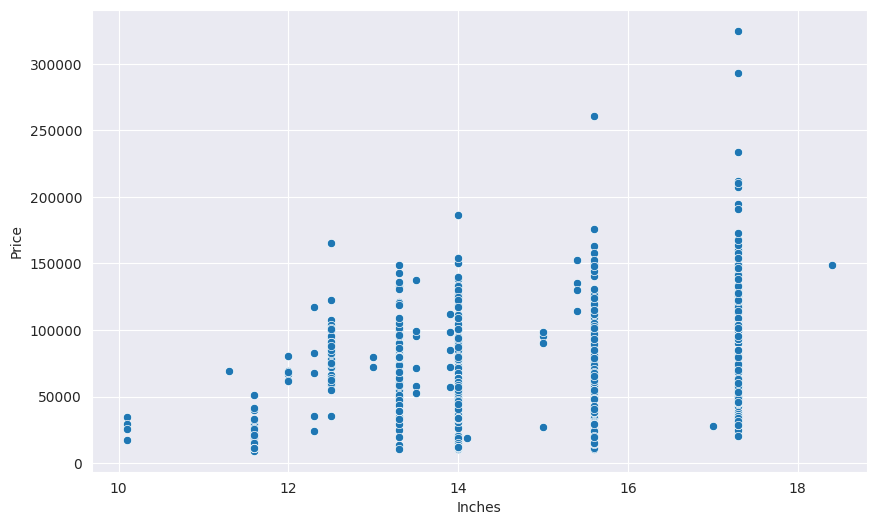

In [19]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = df['Inches'], y = df['Price'])

In [20]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [21]:
df['touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)

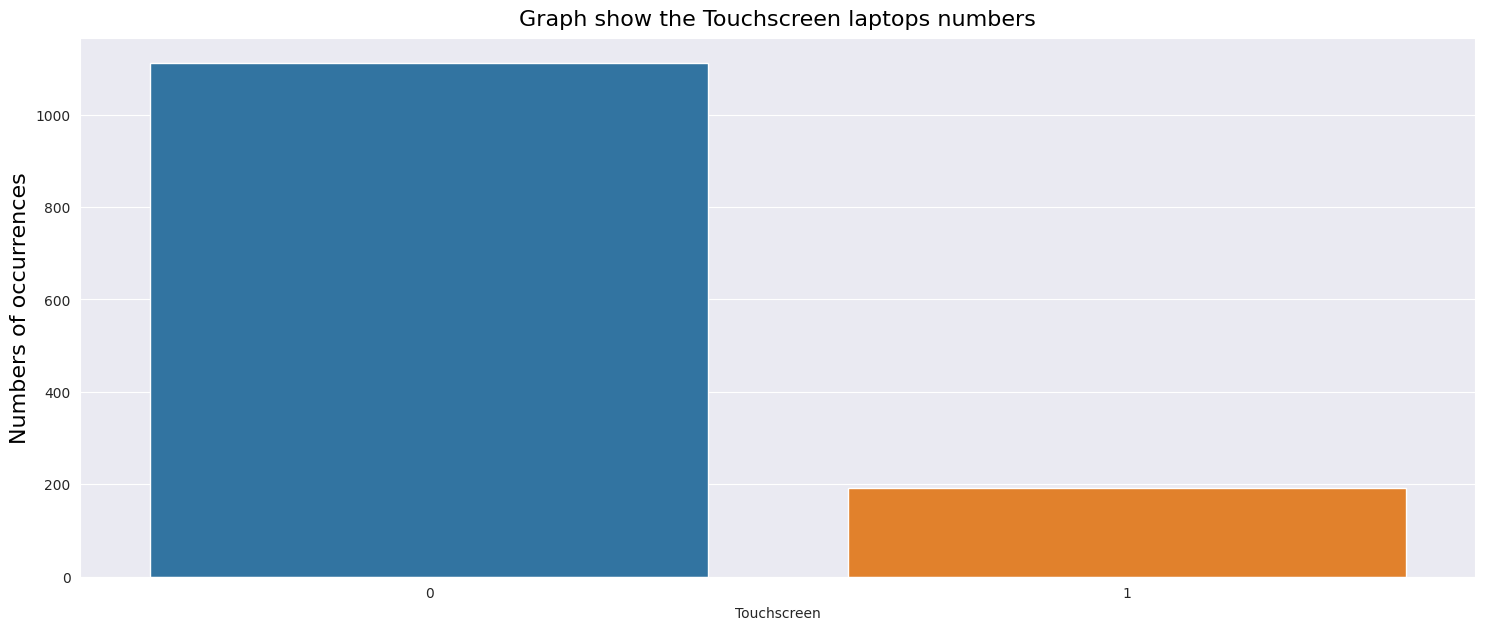

In [22]:
countplot('touchscreen','Touchscreen', 'Numbers of occurrences', 'Graph show the Touchscreen laptops numbers')

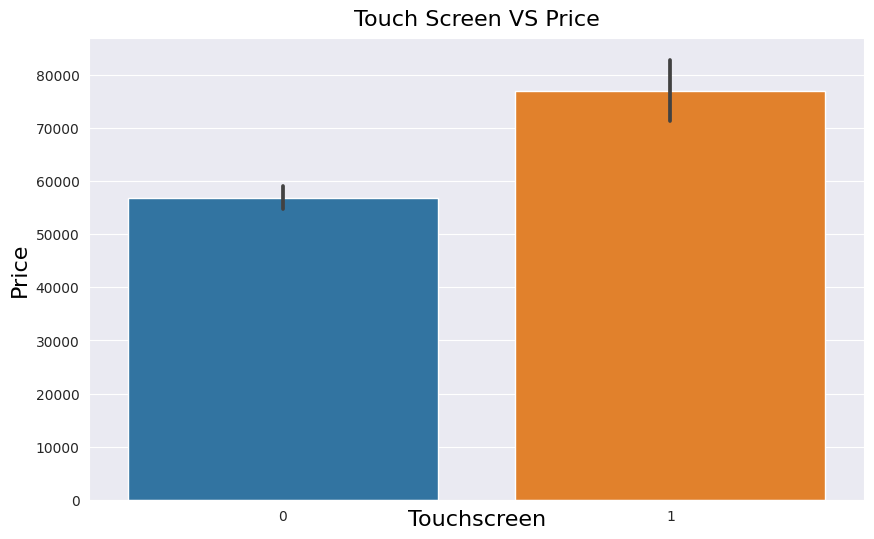

In [23]:
plt.figure(figsize = (10,6))
sns.barplot(x = df['touchscreen'], y = df['Price'])
plt.title('Touch Screen VS Price', ** font)
plt.xlabel('Touchscreen', **font)
plt.ylabel('Price', **font)
plt.show()

In [24]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

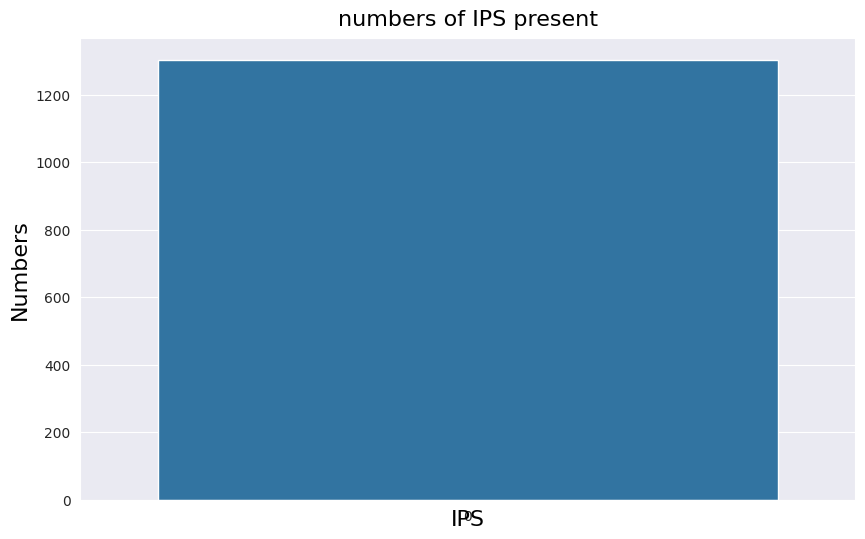

In [25]:
plt.figure(figsize = (10,6))
sns.countplot(df['Ips'])
plt.title('numbers of IPS present', ** font)
plt.xlabel('IPS', **font)
plt.ylabel('Numbers', **font)
plt.show()

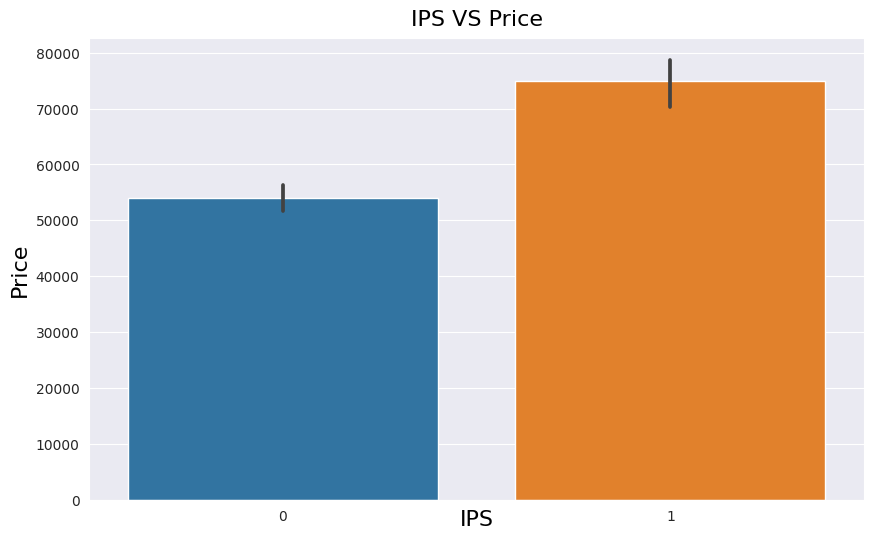

In [26]:
plt.figure(figsize = (10,6))
sns.barplot(x = df['Ips'], y = df['Price'])
plt.title('IPS VS Price', ** font)
plt.xlabel('IPS', **font)
plt.ylabel('Price', **font)
plt.show()

In [27]:
res = df['ScreenResolution'].str.split('x', n =1, expand = True)

In [28]:
df['X_res'] = res[0]
df['Y_res'] = res[1]

In [29]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [30]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [31]:
df['ppi'] = (((df['X_res'] **2) + (df['Y_res'] **2)) **0.5) / df['Inches'].astype('float')

In [32]:
df.drop(columns = ['X_res', 'Y_res', 'Inches', 'ScreenResolution'], inplace = True)

In [33]:
df['CpuName'] = df['Cpu'].apply(lambda x :" " .join(x.split()[:3]))

In [34]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [35]:
df['Cpu brand'] = df['CpuName'].apply(fetch_processor)

In [36]:
df.drop(columns = ['Cpu', 'CpuName'], inplace = True)

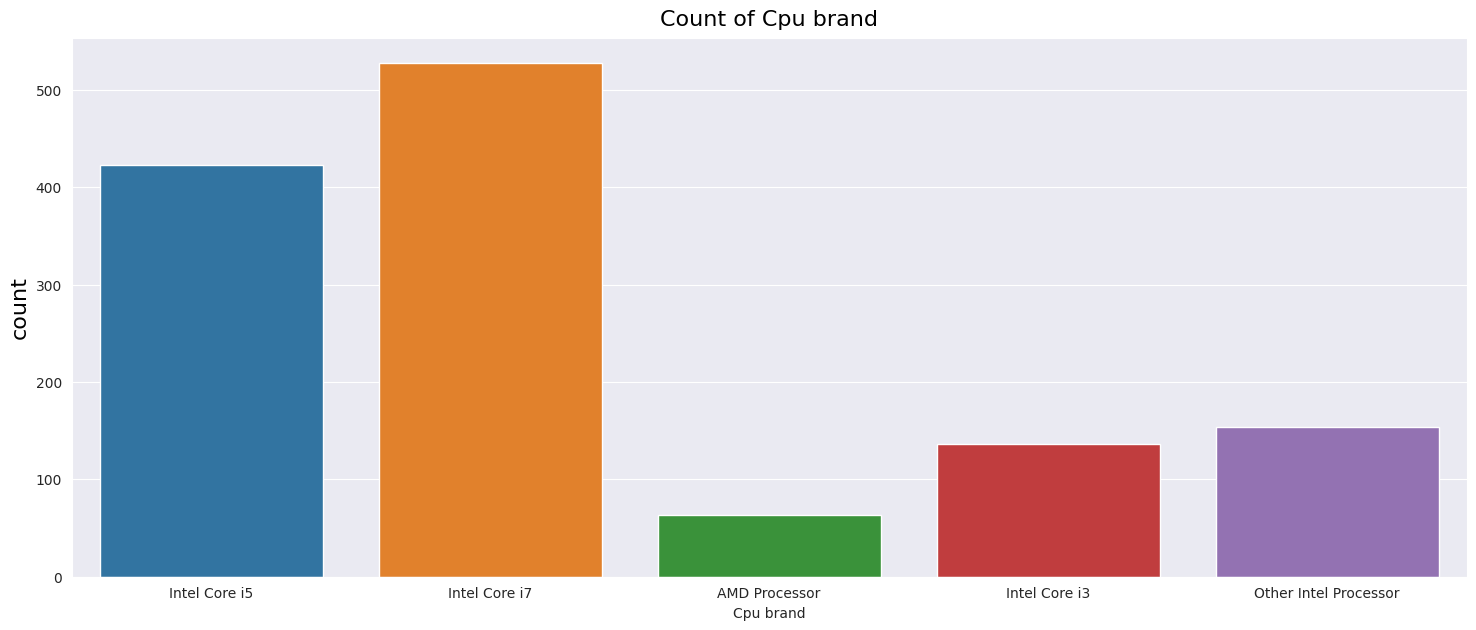

In [37]:
countplot('Cpu brand', 'Cpu brand', 'count', 'Count of Cpu brand')

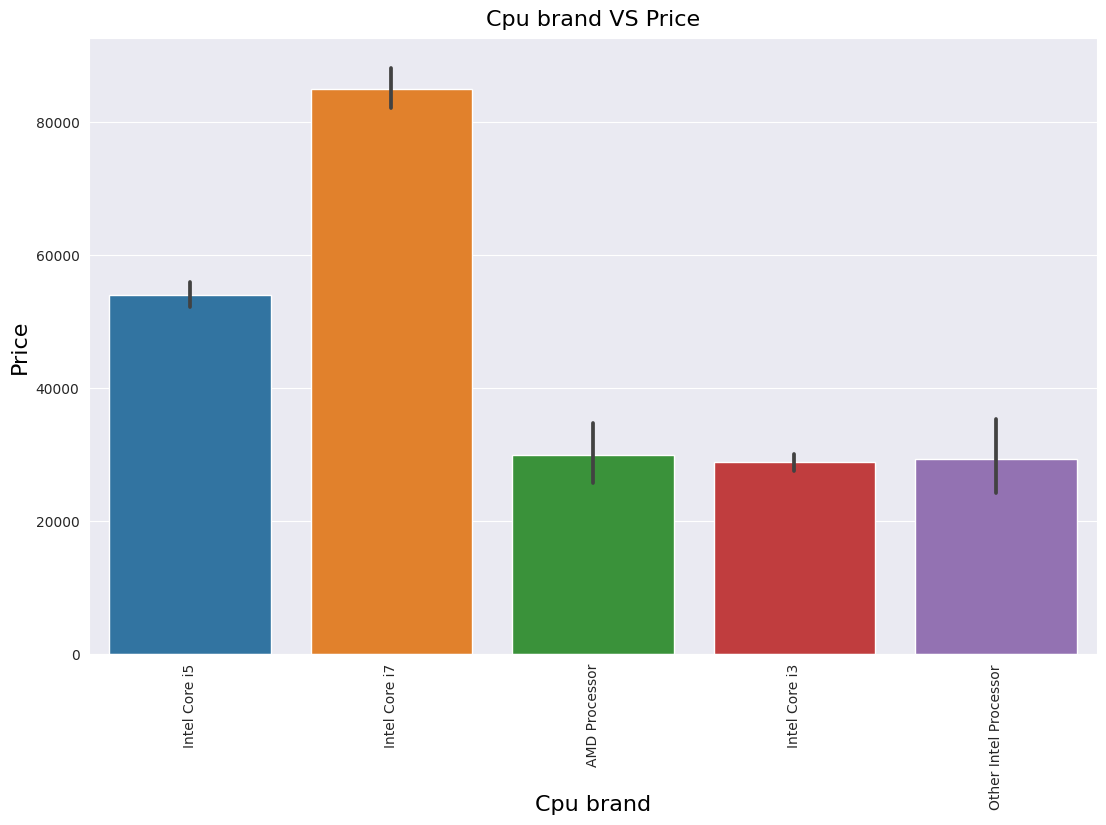

In [38]:
plt.figure(figsize = (13,8))
sns.barplot(x = 'Cpu brand', y = 'Price', data = df)
plt.xticks(rotation = 90)
plt.xlabel('Cpu brand',  **font)
plt.ylabel('Price', **font)
plt.title('Cpu brand VS Price', **font)
plt.show()

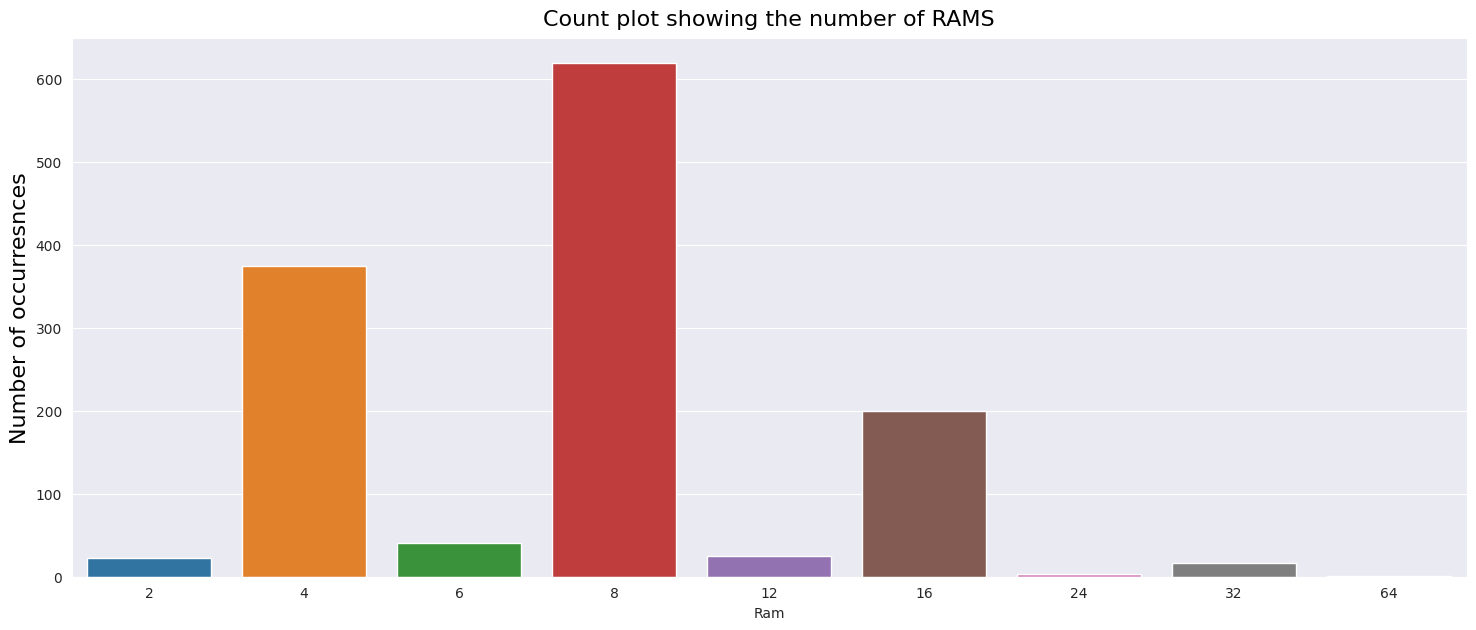

In [39]:
countplot('Ram', 'Ram', 'Number of occurresnces', 'Count plot showing the number of RAMS')

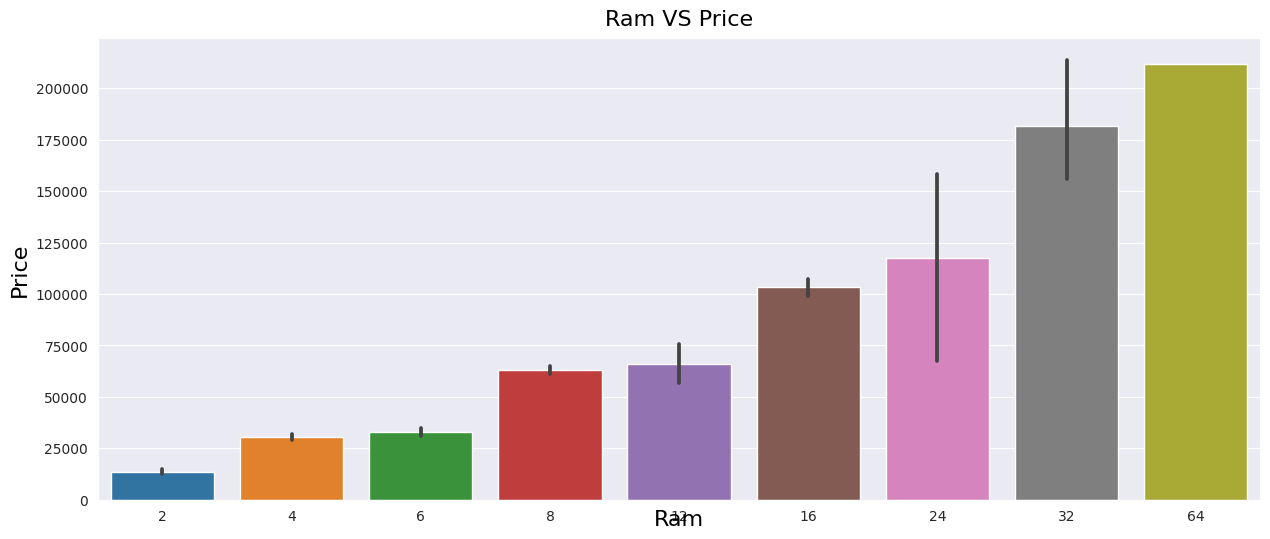

In [40]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'Ram', y = 'Price', data = df)
plt.xlabel('Ram',  **font)
plt.ylabel('Price', **font)
plt.title('Ram VS Price', **font)
plt.show()

In [41]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [42]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex = True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')

In [43]:
new = df['Memory'].str.split('+', n=1, expand =True)

In [44]:
new.value_counts()

0                  1            
128 SSD              1000 HDD       94
256 SSD              1000 HDD       73
512 SSD              1000 HDD       14
256 SSD              2000 HDD       10
512 SSD              2000 HDD        3
1000 SSD             1000 HDD        2
128 SSD              2000 HDD        2
256 SSD              256 SSD         2
                     500 HDD         2
1000 HDD             1000 HDD        1
256 SSD              1000 Hybrid     1
512 SSD              1000 Hybrid     1
                     256 SSD         1
                     512 SSD         1
64 Flash Storage     1000 HDD        1
dtype: int64

In [45]:
df['first'] = new[0]

In [46]:
df["first"]=df["first"].str.strip()

In [47]:
df['second'] = new[1]

In [48]:
df['first'].unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '64 Flash Storage', '32 SSD', '2000 HDD', '64 SSD', '1000 Hybrid',
       '1000 SSD', '16 SSD', '16 Flash Storage', '180 SSD', '32 HDD',
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid'],
      dtype=object)

In [49]:
df['Layer1hdd'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer1ssd'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)

In [50]:
df['first'] = df['first'].str.replace(r'\D', '')

<ipython-input-50-3a46925974fa>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')


In [51]:
df["second"].fillna("0", inplace = True)
df["Layer2hdd"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2ssd"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df['second'] = df['second'].str.replace(r'\D', '')

<ipython-input-51-06bb3f4d52ee>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [52]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [53]:
df["HDD"]=(df["first"]*df["Layer1hdd"]+df["second"]*df["Layer2hdd"])
df["SSD"]=(df["first"]*df["Layer1ssd"]+df["second"]*df["Layer2ssd"])

In [54]:
df.drop(columns=['first', 'second', 'Layer1hdd', 'Layer1ssd',
                 'Layer2hdd', 'Layer2ssd'],inplace=True)

In [55]:
df.drop(columns = 'Memory', inplace = True)

In [56]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [57]:
df['Gpu brand']  = df['Gpu'].apply(lambda x:x.split()[0])

In [58]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [59]:
df = df[df['Gpu brand'] != 'ARM']

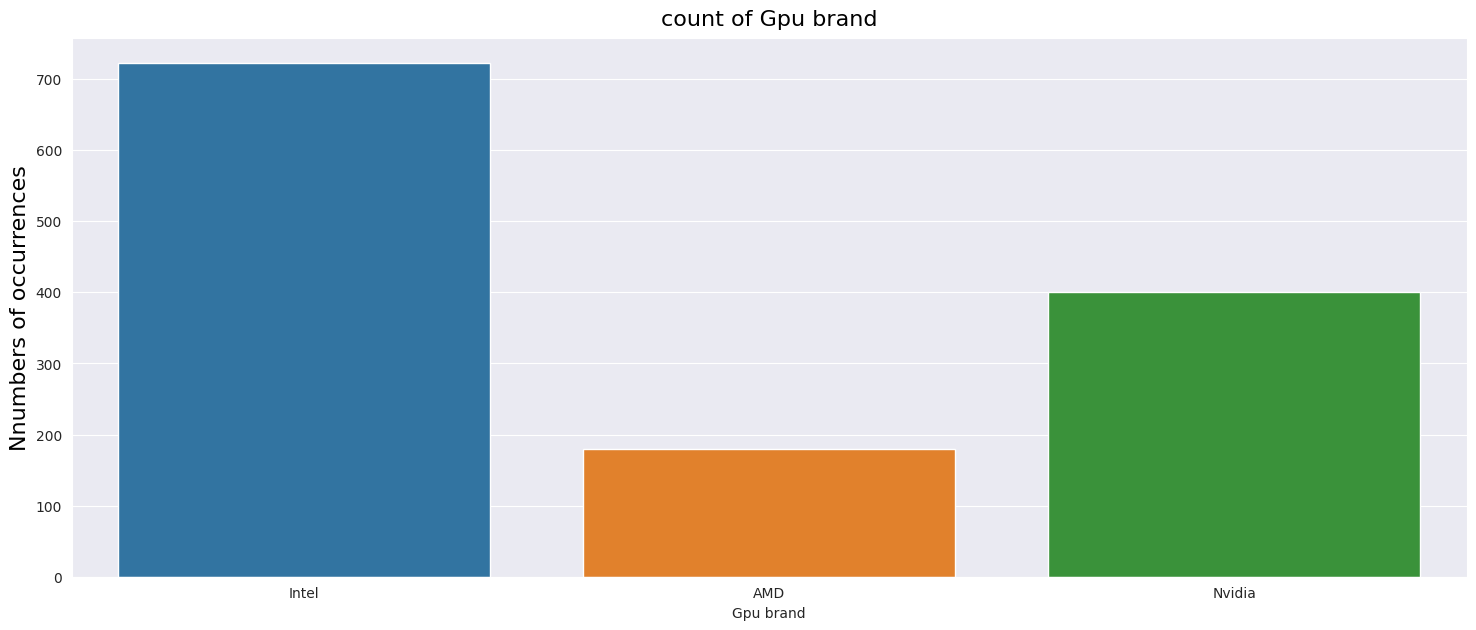

In [60]:
countplot('Gpu brand', 'Gpu brand', 'Nnumbers of occurrences', 'count of Gpu brand')

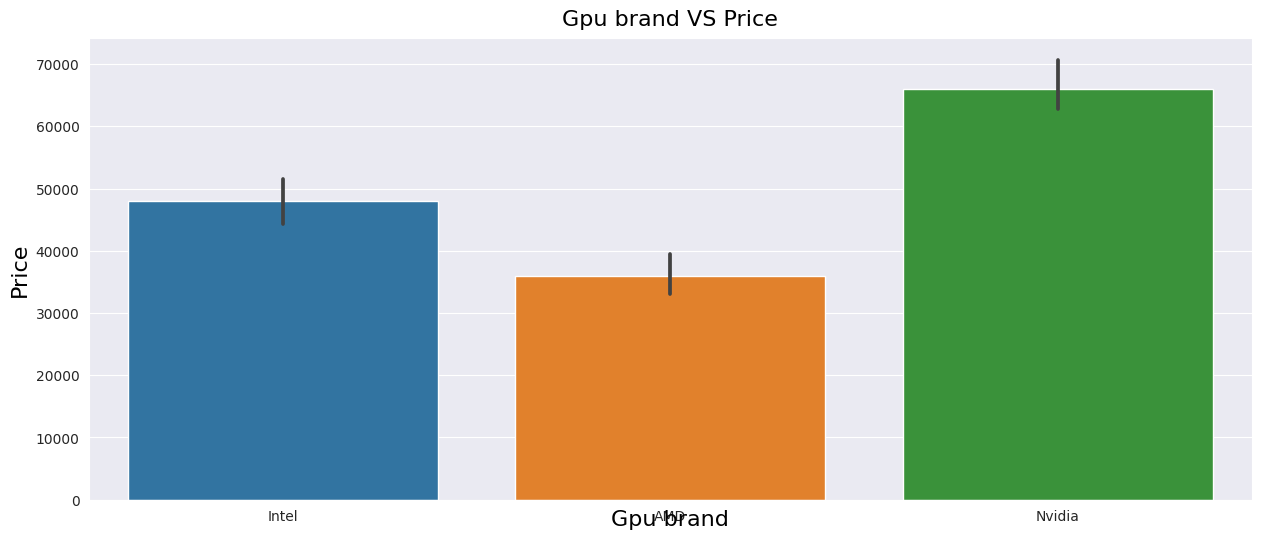

In [61]:
plt.figure(figsize = (15,6))
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xlabel('Gpu brand',  **font)
plt.ylabel('Price', **font)
plt.title('Gpu brand VS Price', **font)
plt.show()

In [62]:
df.drop(columns=['Gpu'],inplace=True)

In [63]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [64]:
def cat_os(os):
    if os == 'Windows 10' or os == 'Windows 7' or os == 'Windows 10 S':
        return 'Windows'
    elif os == 'Mac OS X' or os == 'macOS':
        return 'Mac'
    else:
        return 'others/NO OS/Linux'

In [65]:
df['OS'] = df['OpSys'].apply(cat_os)

In [66]:
df.drop(columns = 'OpSys', inplace = True)

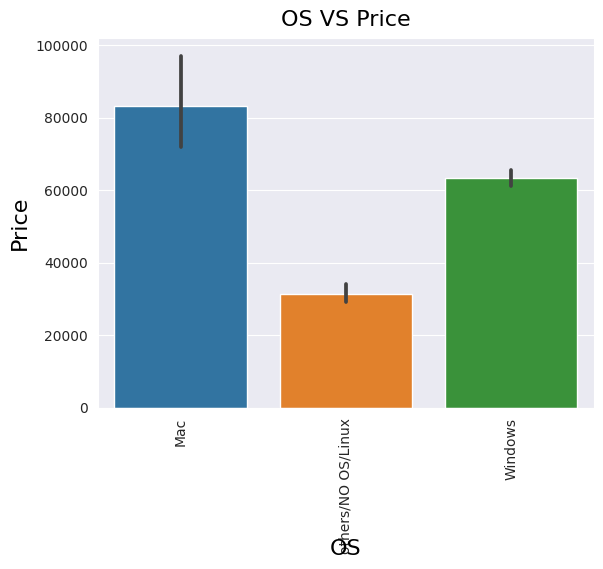

In [67]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.xlabel('OS',  **font)
plt.ylabel('Price', **font)
plt.title('OS VS Price', **font)
plt.show()

<ipython-input-68-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

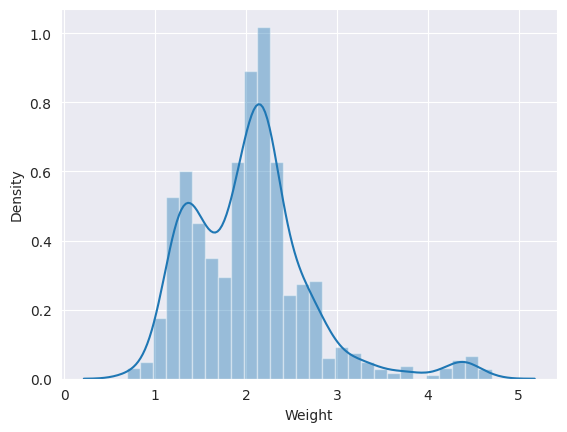

In [68]:
sns.distplot(df['Weight'])

Text(0.5, 1.0, 'Weight VS Price')

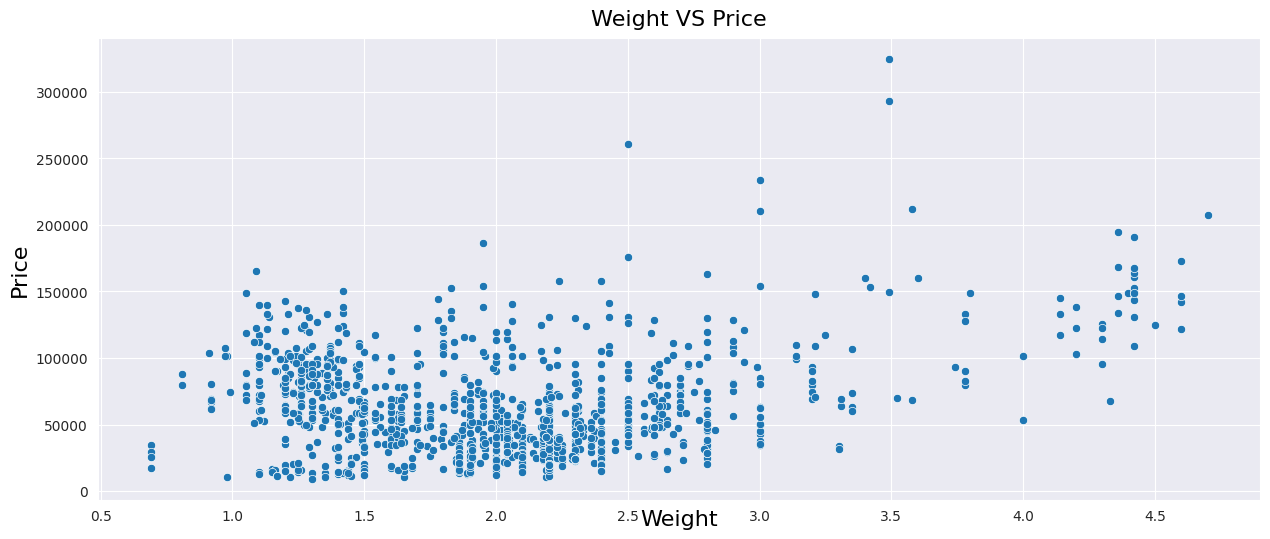

In [69]:
plt.figure(figsize = (15,6))
sns.scatterplot(x=df['Weight'],y=df['Price'])
plt.xlabel('Weight',  **font)
plt.ylabel('Price', **font)
plt.title('Weight VS Price', **font)

In [70]:
df.corr()['Price']

<ipython-input-70-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram            0.742905
Weight         0.209867
Price          1.000000
touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<ipython-input-71-ed8e7d340eb1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

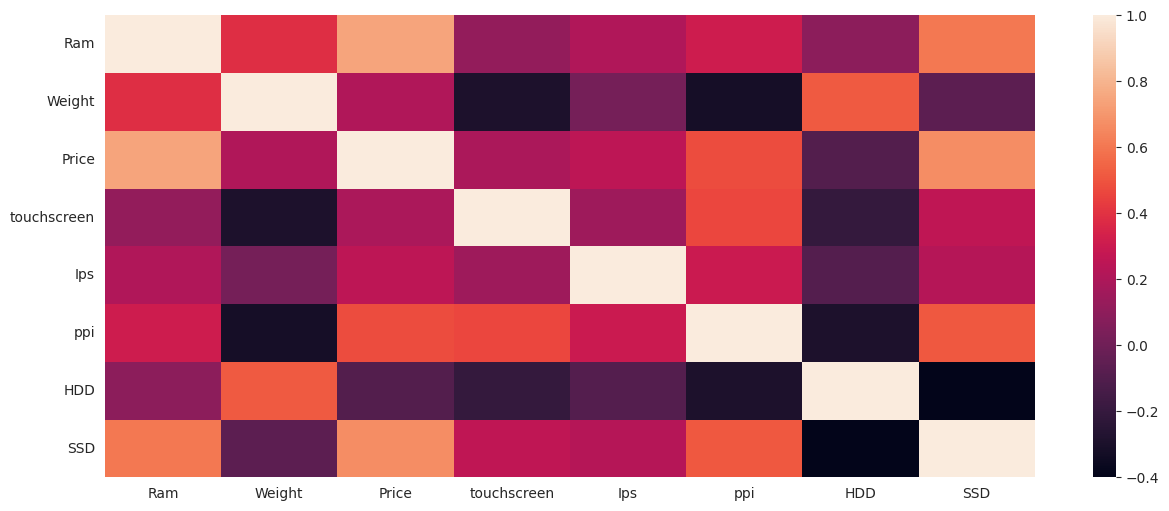

In [71]:
plt.figure(figsize = (15,6))
sns.heatmap(df.corr())

<ipython-input-72-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

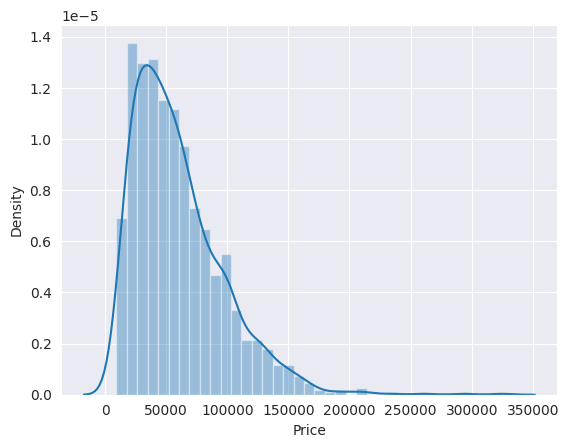

In [72]:
sns.distplot(df['Price'])

<ipython-input-73-c1a82a4801f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

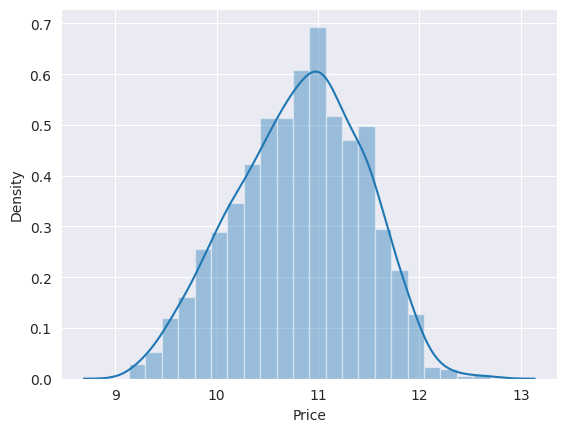

In [73]:

sns.distplot(np.log(df['Price']))

In [74]:
df.head()

,Company,TypeName,Ram,Weight,Price,touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,others/NO OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [75]:
X = df.drop(columns=['Price'])
Y = np.log(df['Price'])

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=5)

In [77]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=300,
                              random_state=1,
                              max_samples=0.8,
                              max_features=0.75,
                              max_depth=20)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.9150123959096494
MAE 0.1424436083778887
